In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
zomato_df = pd.read_csv(r"dataset2.csv")
zomato_df_cpy=zomato_df.copy()
print(zomato_df.head())
zomato_df.describe()

                                                 url  \
0  https://www.zomato.com/bangalore/cafe-vivacity...   
1  https://www.zomato.com/bangalore/catch-up-ino-...   
2  https://www.zomato.com/bangalore/kirthis-birya...   
3  https://www.zomato.com/bangalore/t3h-cafe-bana...   
4  https://www.zomato.com/bangalore/360-atoms-res...   

                                             address  \
0  2303, 21st Cross, K R Road, 2nd Stage, Banasha...   
1  241, 4th Floor, 100 Feet Ring Road, Opposite K...   
2  405, 24th Cross, 9th Main, 2nd Stage, Banashan...   
3  504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
4  47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...   

                            name online_order book_table  rate  votes  \
0                  Cafe Vivacity          Yes         No   3.8     90   
1                   Catch-up-ino          Yes         No   3.8    133   
2               Kirthi's Biryani          Yes         No   3.8    144   
3                       T3H Cafe  

,rate,votes,approx_cost(for two people)
count,1142.000000,1142.000000,1142.000000
mean,4.073905,137.548161,408.432574
std,0.597719,296.129263,189.656949
min,2.300000,0.000000,100.000000
25%,3.600000,5.000000,300.000000
50%,4.000000,28.000000,400.000000
75%,4.600000,121.750000,500.000000
max,5.000000,2745.000000,900.000000


In [3]:
zomato_df 

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/cafe-vivacity...,"2303, 21st Cross, K R Road, 2nd Stage, Banasha...",Cafe Vivacity,Yes,No,3.8,90,080 26768182\r\n+91 9845704455,Banashankari,Cafe,"Garlic Bread, Burgers, Sandwiches, Pizza, Hot ...",Cafe,650,Cafes,Banashankari
1,https://www.zomato.com/bangalore/catch-up-ino-...,"241, 4th Floor, 100 Feet Ring Road, Opposite K...",Catch-up-ino,Yes,No,3.8,133,+91 9972988038\r\n+91 9900121238,Banashankari,Cafe,"Momos, Mushroom Bruschettas, Jalapeno Cheeseba...","Cafe, Fast Food, Continental, Chinese, Momos",800,Cafes,Banashankari
2,https://www.zomato.com/bangalore/kirthis-birya...,"405, 24th Cross, 9th Main, 2nd Stage, Banashan...",Kirthi's Biryani,Yes,No,3.8,144,080 26711554\r\n+91 9741406338,Banashankari,Cafe,"Pasta, Gelato, Garlic Bread, Mojito, Nachos, P...","Chinese, Cafe, Italian",700,Cafes,Banashankari
3,https://www.zomato.com/bangalore/t3h-cafe-bana...,"504, CJ Venkata Das Road, Padmanabhangar, 2nd ...",T3H Cafe,No,No,3.8,93,+91 8884726600,Banashankari,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,Cafes,Banashankari
4,https://www.zomato.com/bangalore/360-atoms-res...,"47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...",360 Atoms Restaurant And Cafe,Yes,No,3.8,13,+91 9880594520,Banashankari,Cafe,NaN,"Cafe, Chinese, Continental, Italian",400,Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,https://www.zomato.com/bangalore/arya-s-l-bake...,"38/15, New 117, Bazaar Street, Neelasandra, Ri...",Arya S.L.Bakery,No,No,3.9,0,+91 9742572009,Richmond Road,"Bakery, Beverage Shop",NaN,"Bakery, Juices, Fast Food",200,Desserts,MG Road
1138,https://www.zomato.com/bangalore/lake-n-bake-c...,"Next to Khazana Jewellery, St. Johns Road, Com...",Lake N Bake,No,No,3.9,0,+91 9483668779\n+91 8892264758,Commercial Street,Bakery,NaN,"Bakery, Beverages",300,Desserts,MG Road
1139,https://www.zomato.com/bangalore/the-corner-hy...,"Hyatt Centric MG Road 1/1, Swami Vivekananda R...",The Corner - Hyatt Centric MG Road,No,No,3.9,0,080 49361234,Ulsoor,Cafe,NaN,"Cafe, Desserts, Fast Food",300,Desserts,MG Road
1140,https://www.zomato.com/bangalore/batter-splatt...,"Kasturba Road, Sampangi Rama Nagar, Near Lavel...",Batter Splatter,No,No,3.9,5,+91 7760058395,Lavelle Road,Bakery,NaN,Bakery,300,Desserts,MG Road


In [4]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return value
zomato_df['rate']=zomato_df['rate'].apply(handleRate)
print(zomato_df.head())


                                                 url  \
0  https://www.zomato.com/bangalore/cafe-vivacity...   
1  https://www.zomato.com/bangalore/catch-up-ino-...   
2  https://www.zomato.com/bangalore/kirthis-birya...   
3  https://www.zomato.com/bangalore/t3h-cafe-bana...   
4  https://www.zomato.com/bangalore/360-atoms-res...   

                                             address  \
0  2303, 21st Cross, K R Road, 2nd Stage, Banasha...   
1  241, 4th Floor, 100 Feet Ring Road, Opposite K...   
2  405, 24th Cross, 9th Main, 2nd Stage, Banashan...   
3  504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
4  47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...   

                            name online_order book_table rate  votes  \
0                  Cafe Vivacity          Yes         No  3.8     90   
1                   Catch-up-ino          Yes         No  3.8    133   
2               Kirthi's Biryani          Yes         No  3.8    144   
3                       T3H Cafe      

In [5]:

zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          1142 non-null   object
 1   address                      1142 non-null   object
 2   name                         1142 non-null   object
 3   online_order                 1142 non-null   object
 4   book_table                   1142 non-null   object
 5   rate                         1142 non-null   object
 6   votes                        1142 non-null   int64 
 7   phone                        1117 non-null   object
 8   location                     1142 non-null   object
 9   rest_type                    1140 non-null   object
 10  dish_liked                   427 non-null    object
 11  cuisines                     1141 non-null   object
 12  approx_cost(for two people)  1142 non-null   int64 
 13  listed_in(type)              1142

Text(0.5, 0, 'Type of restaurant')

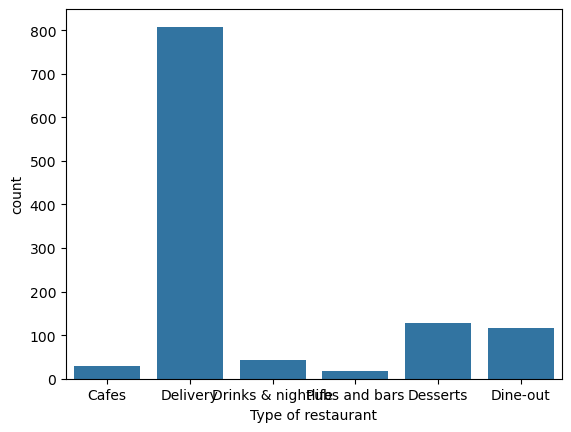

In [6]:
sns.countplot(x=zomato_df['listed_in(type)'])
plt.xlabel("Type of restaurant")

<Axes: xlabel='online_order', ylabel='count'>

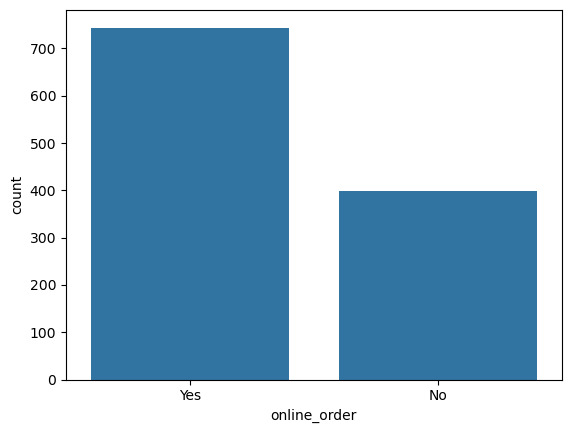

In [7]:
sns.countplot(x=zomato_df['online_order'])

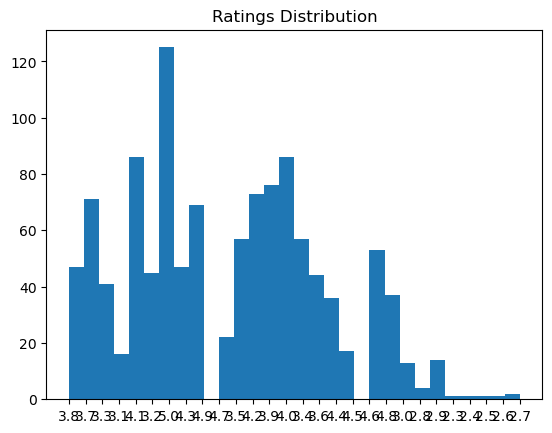

In [8]:
plt.hist(zomato_df['rate'],bins=30)
plt.title("Ratings Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

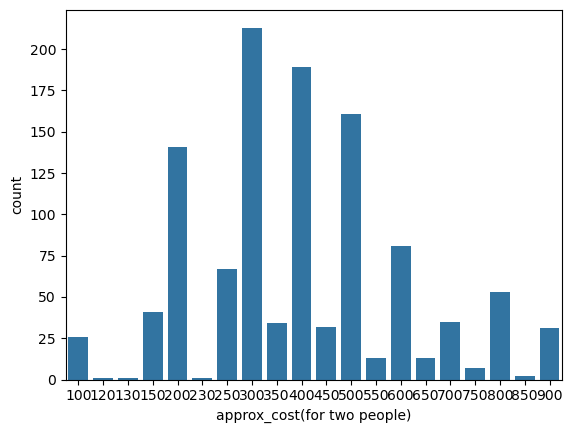

In [9]:
couple_data=zomato_df['approx_cost(for two people)']
sns.countplot(x=couple_data)

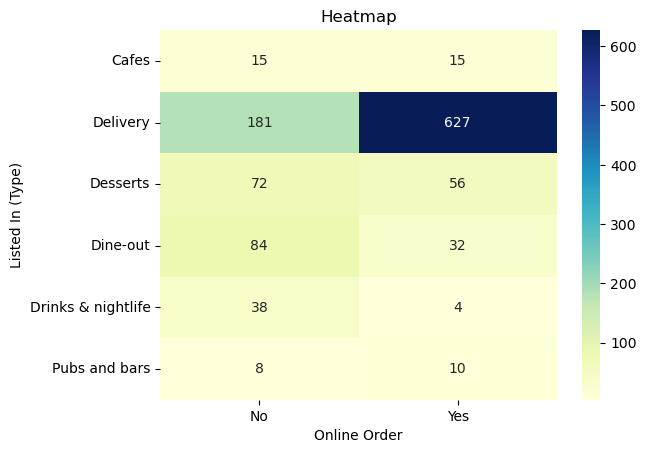

In [10]:
pivot_table = zomato_df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()



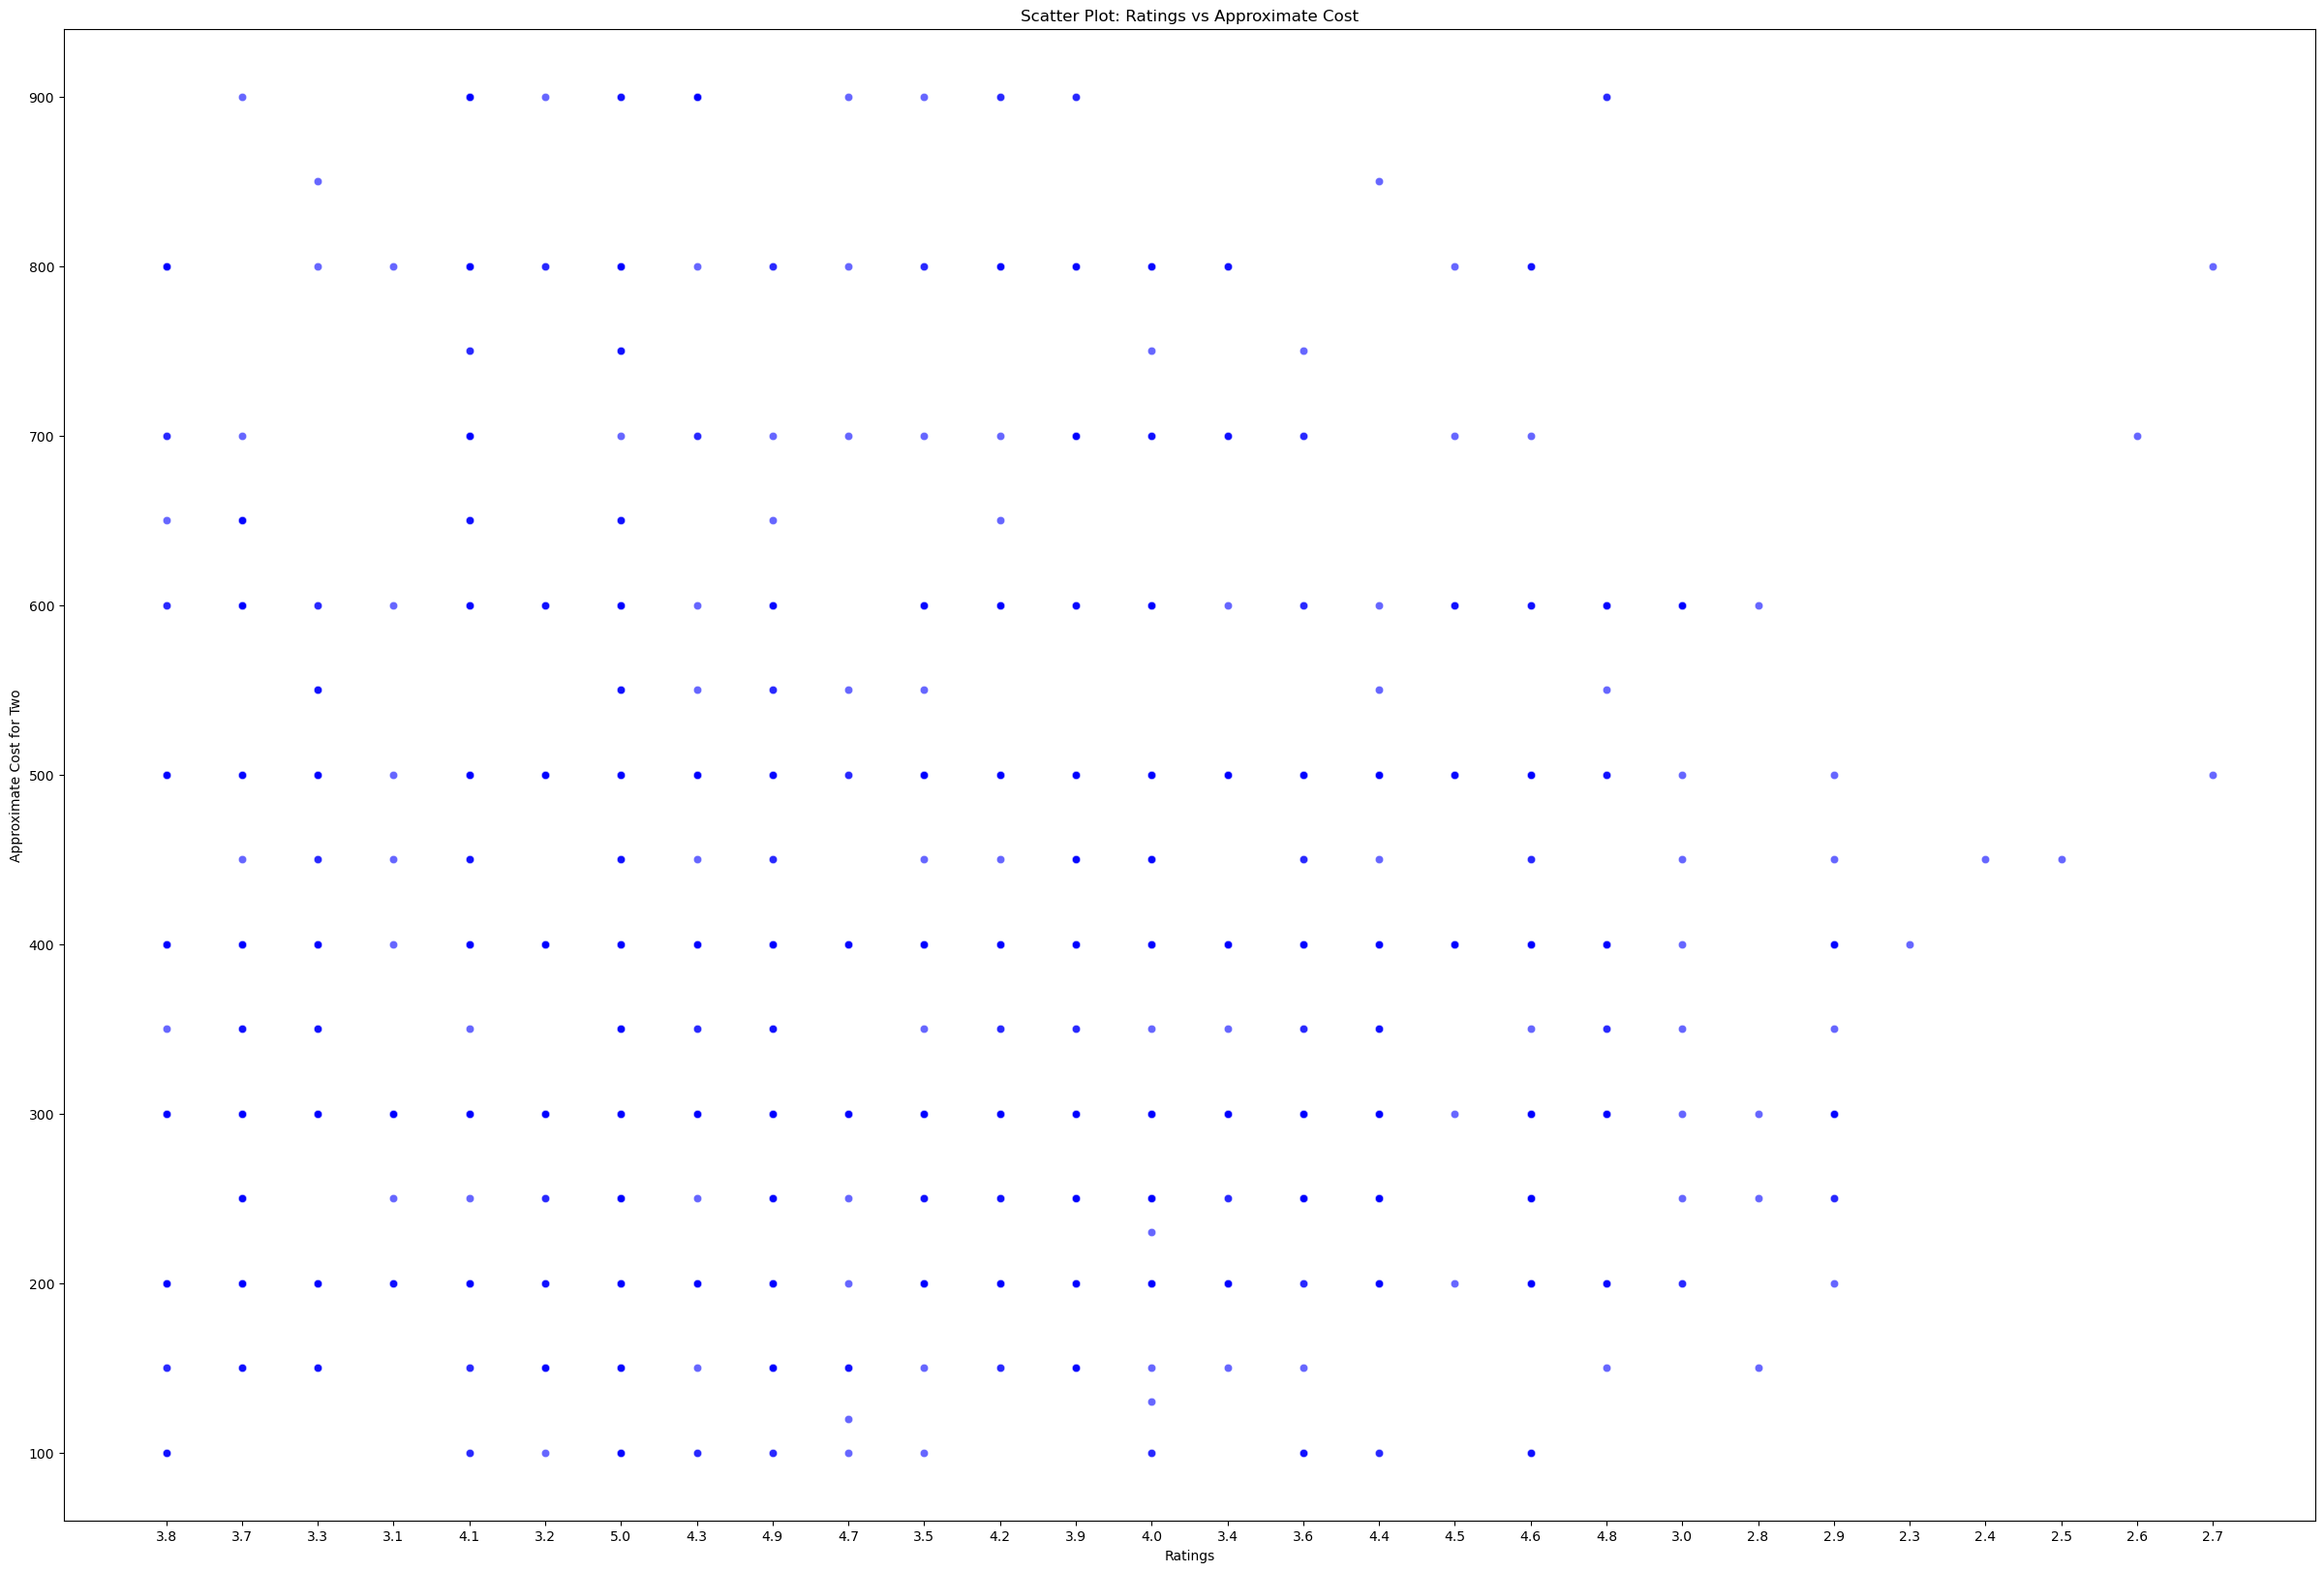

In [11]:
plt.figure(figsize=(30, 20))
sns.scatterplot(x=zomato_df['rate'], y=zomato_df['approx_cost(for two people)'], alpha=0.6, color='blue')
# Labels and title
plt.xlabel("Ratings")
plt.ylabel("Approximate Cost for Two")
plt.title("Scatter Plot: Ratings vs Approximate Cost")
plt.show()

In [12]:
zomato_df.dropna(subset=['dish_liked'], inplace=True)
# Convert to lowercase and split by commas
dish_list = []
for dishes in zomato_df['dish_liked']:
    dish_list.extend(dishes.lower().split(','))
# Strip whitespace
dish_list = [dish.strip() for dish in dish_list]
# Count occurrences of each dish
dish_counts = Counter(dish_list)
# Get the top 10 most liked dishes
top_dishes = dish_counts.most_common(10)
# Convert to separate lists
dish_names, dish_values = zip(*top_dishes)

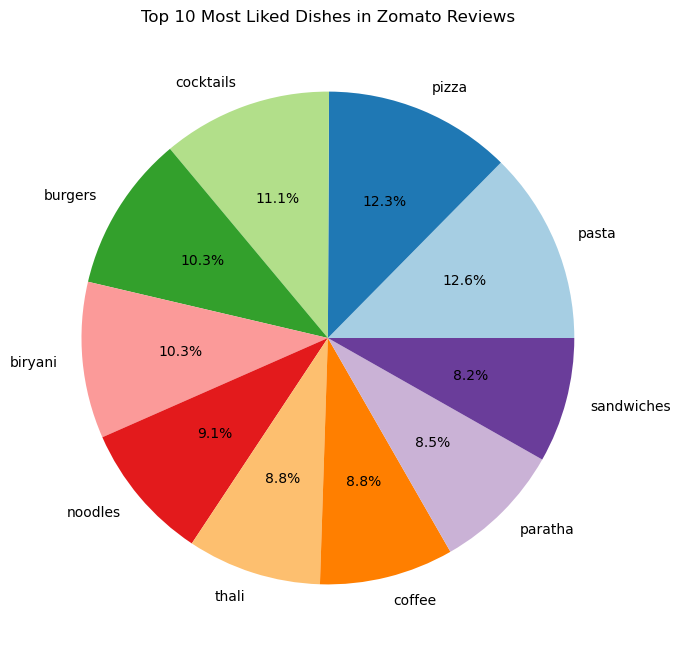

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(dish_values, labels=dish_names, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
# Title
plt.title("Top 10 Most Liked Dishes in Zomato Reviews")
plt.show()

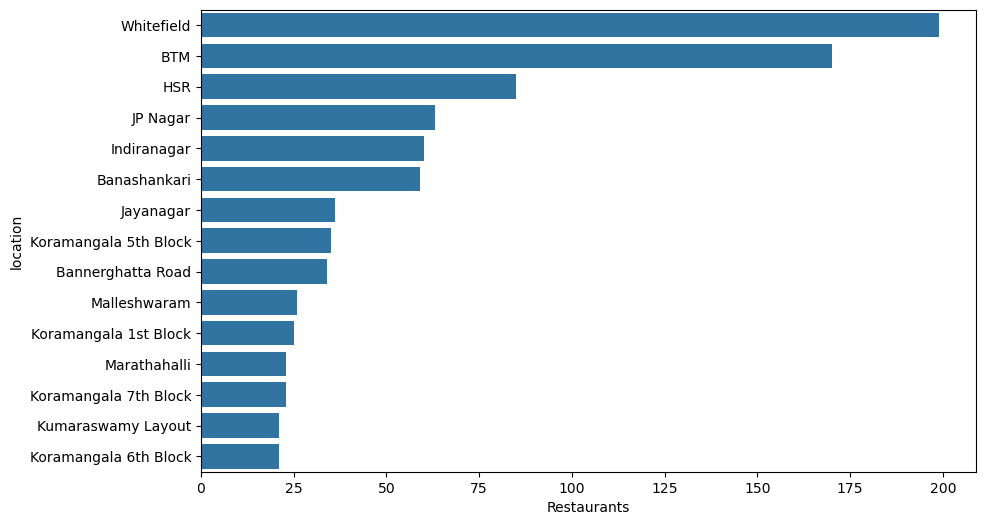

In [14]:
res_sort = zomato_df_cpy.groupby('location')['name'].count().sort_values(ascending = False)
res_sort = pd.DataFrame({'location': res_sort.index, 'Restaurants': res_sort.values})
plt.figure(figsize=(10,6))
sns.barplot(y= res_sort[:15].location,x=res_sort[:15].Restaurants,data = res_sort)
plt.show()

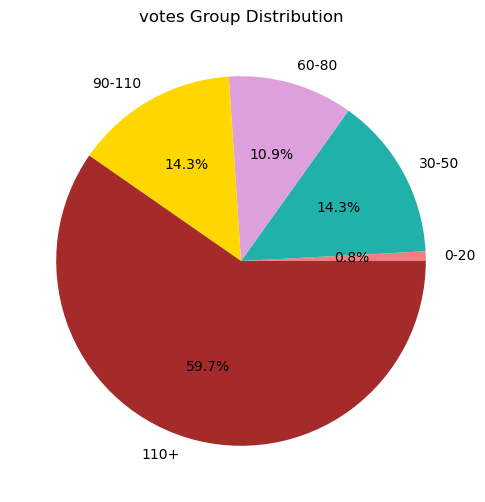

In [15]:
votes_bins = [20, 30, 40, 50, 60, 100]
votes_labels = ['0-20', '30-50', '60-80', '90-110', '110+']
zomato_df['votes Group'] = pd.cut(zomato_df['votes'], bins=votes_bins, labels=votes_labels)
plt.figure(figsize=(6, 6))
votes_counts = zomato_df['votes Group'].value_counts().sort_index()
plt.pie(votes_counts, labels=votes_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightseagreen', 'plum', 'gold', 'brown'])
plt.title("votes Group Distribution")
plt.show()

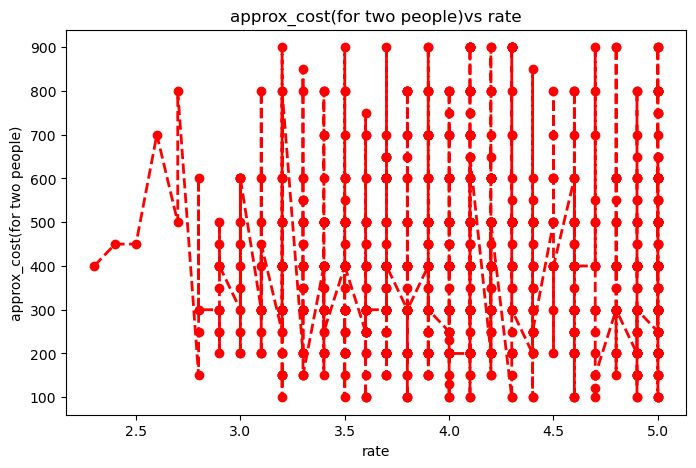

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = r"dataset2.csv"  
zomato_df = pd.read_csv(file_path)
zomato_df_sorted = zomato_df.sort_values(by="rate")
plt.figure(figsize=(8, 5))
plt.plot(zomato_df_sorted["rate"], zomato_df_sorted["approx_cost(for two people)"], c='r', linestyle='--', linewidth=2, marker='o')
plt.xlabel("rate")
plt.ylabel("approx_cost(for two people)")
plt.title("approx_cost(for two people)vs rate")
plt.show()

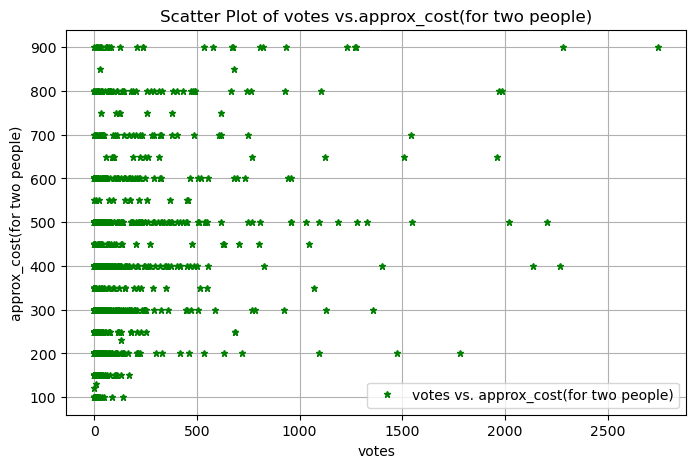

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = r"dataset2.csv"
zomato_df = pd.read_csv(file_path)
x = zomato_df["votes"]
y = zomato_df["approx_cost(for two people)"]
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='*', markersize=5, linestyle='', c='g', label="votes vs. approx_cost(for two people)")
plt.xlabel("votes")
plt.ylabel("approx_cost(for two people)")
plt.title("Scatter Plot of votes vs.approx_cost(for two people)")
plt.legend()
plt.grid(True)
plt.show()

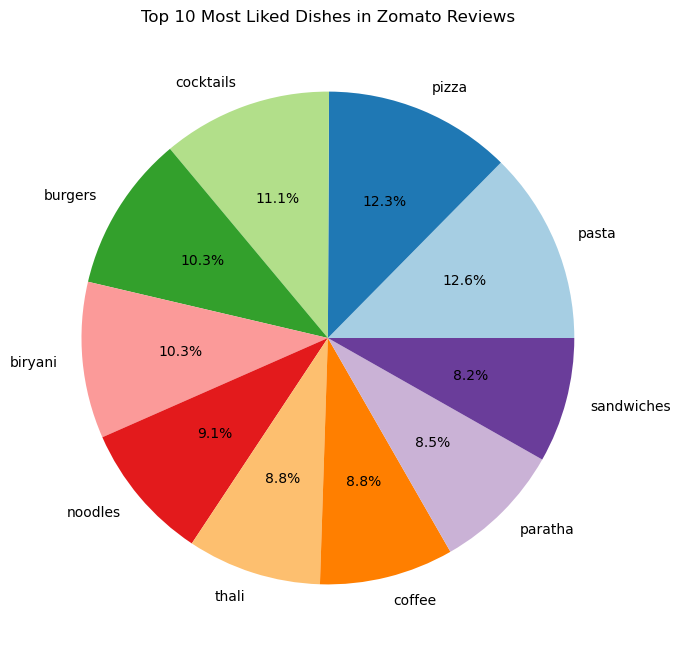

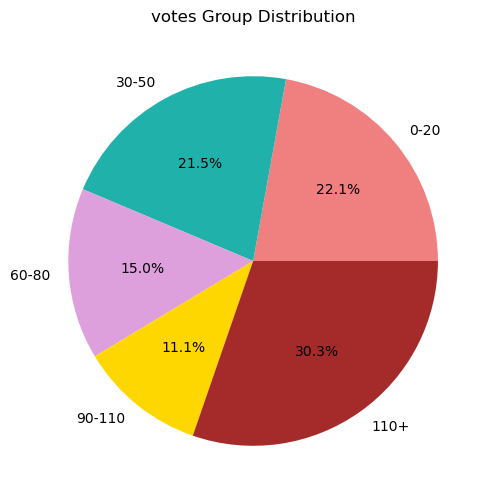

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"dataset2.csv"  # Update the path if needed
zomato_df = pd.read_csv(file_path)



# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(dish_values, labels=dish_names, autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Title
plt.title("Top 10 Most Liked Dishes in Zomato Reviews")
plt.show()
# Pie chart for Age groups
votes_bins = [20, 30, 40, 50, 60, 100]
votes_labels = ['0-20', '30-50', '60-80', '90-110', '110+']
zomato_df['votes Group'] = pd.cut(zomato_df['votes'], bins=votes_bins, labels=votes_labels)
plt.figure(figsize=(6, 6))
votes_counts = zomato_df['votes Group'].value_counts().sort_index()
plt.pie(votes_counts, labels=votes_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightseagreen', 'plum', 'gold', 'brown'])
plt.title("votes Group Distribution")
plt.show()

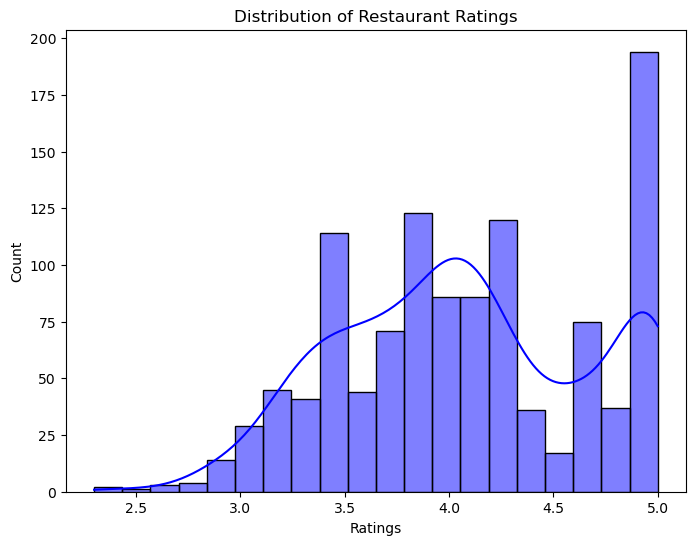

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(zomato_df['rate'], bins=20, kde=True, color="blue")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Distribution of Restaurant Ratings")
plt.show()


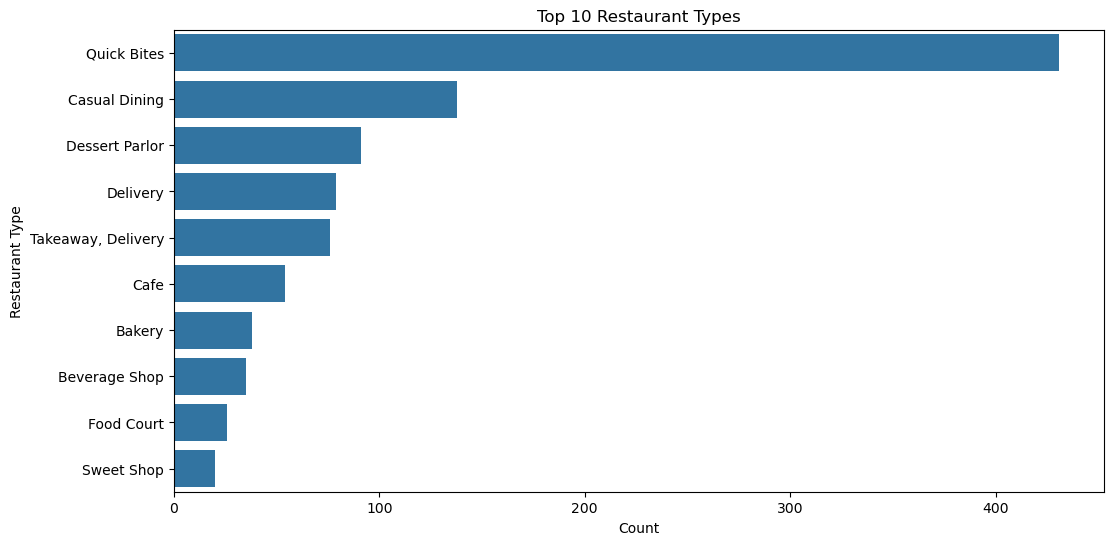

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(y=zomato_df['rest_type'], order=zomato_df['rest_type'].value_counts().index[:10])
plt.xlabel("Count")
plt.ylabel("Restaurant Type")
plt.title("Top 10 Restaurant Types")
plt.show()

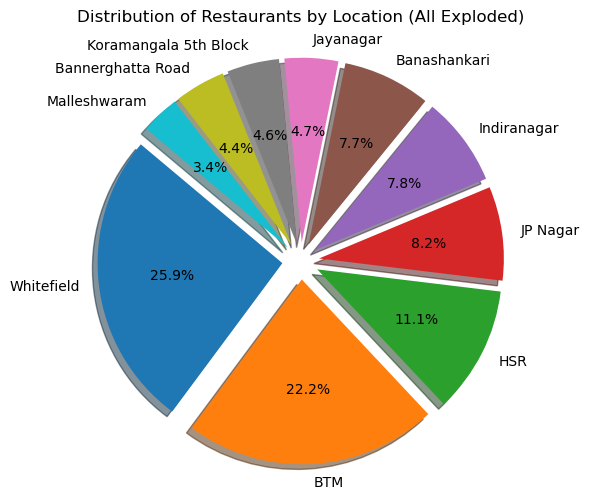

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
location_counts = zomato_df['location'].value_counts()
top_locations = location_counts[:10] 
explode = [0.1 for _ in range(len(top_locations))]  
plt.figure(figsize=(10, 6))
plt.pie(top_locations, labels=top_locations.index, autopct='%1.1f%%', 
        explode=explode, shadow=True, startangle=140)

plt.title('Distribution of Restaurants by Location (All Exploded)')
plt.show()


In [ ]:
import tkinter as tk
from tkinter import Canvas, Button, messagebox
from PIL import Image, ImageTk
import pandas as pd

root = tk.Tk()
root.title("BANGLORE ZOMATO AND RESTAURANT DATA ANALYSIS")
root.geometry("1200x700")  
root.config(bg="white")

image_reference = None

def load_image(image_path):
    global image_reference 
    try:
        img = Image.open(image_path)
        img = img.resize((500, 450))  
        image_reference = ImageTk.PhotoImage(img)  
        return image_reference
    except FileNotFoundError:
        messagebox.showerror("Error", f"Image not found: {image_path}")
        return None  

try:
    img = Image.open("zomato11.png")
    img = img.resize((1200, 700))  
    bg_image = ImageTk.PhotoImage(img)

    canvas = Canvas(root, width=1200, height=700)
    canvas.pack(fill="both", expand=True)
    canvas.create_image(0, 0, image=bg_image, anchor='nw')
    canvas.image = bg_image
except Exception as e:
    print(f"Error loading image: {e}")

header_label = tk.Label(root, text="BANGLORE ZOMATO AND RESTAURANT DATA ANALYSIS",
                        bg="red", fg="black",
                        font=("Arial", 18, "bold"),  
                        padx=10, pady=5)
header_label.place(x=300, y=10)

# 1. Load Data
def load_data():
    try:
        df = pd.read_csv("dataset2.csv")
        messagebox.showinfo("Success", "Data Loaded Successfully!")
    except FileNotFoundError:
        messagebox.showerror("Error", "Data file not found!")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

def clear_canvas():
    canvas.delete("all")
    canvas.create_image(0, 0, image=bg_image, anchor='nw')  

def display_image_on_canvas(image_path):
    clear_canvas()
    img = load_image(image_path)
    if img:
        image_label = tk.Label(root, image=img)
        image_label.image = img 
        image_label.place(x=300, y=100)

# 2. Information of Data
def data_info():
    display_image_on_canvas("info.png")

# 3. Description of Data
def describe_data():
    display_image_on_canvas("describe.png")

# 4. Top 10 liked dishes
def top_10_liked():
    display_image_on_canvas("top10.png")

# 5. Histogram Plot for Data
def histogram_plot():
    display_image_on_canvas("hist.png")

# 6. Scatter Plot for Data
def scatter_plot():
    display_image_on_canvas("scatterplot.png")

# 7. Heatmap plot
def heatmap_plot():
    display_image_on_canvas("heatmap.png")

# 8. Bargraph Plot for Data
def bargraph_plot():
    display_image_on_canvas("bar.png")

# 9. Line scattered Plot for Data
def linescattered_plot():
    display_image_on_canvas("line.png")

# 10. Distribution Plot for Data
def distribution_plot():
    display_image_on_canvas("distribution.png")

# 11. Logistic regression Plot for Data
def logistic_plot():
    display_image_on_canvas("logistic.png")



button_style = {
    "bg": "green",
    "fg": "white",
    "font": ("Arial", 11, "bold"),  
    "width": 30,  
    "height": 2,  
    "borderwidth": 2,
    "relief": "ridge",
    "activebackground": "#754CBD",
    "activeforeground": "white"
}

Button(root, text="LOAD THE DATA", command=load_data, **button_style).place(x=20, y=100)
Button(root, text="INFORMATION OF DATA", command=data_info, **button_style).place(x=20, y=150)
Button(root, text="DESCRIPTION OF DATA", command=describe_data, **button_style).place(x=20, y=200)
Button(root, text="TOP 10 LIKED DISHES", command=top_10_liked, **button_style).place(x=20, y=250)
Button(root, text="HISTOGRAM PLOT FOR DATA", command=histogram_plot, **button_style).place(x=20, y=300)
Button(root, text="SCATTER PLOT FOR DATA", command=scatter_plot, **button_style).place(x=20, y=350)
Button(root, text="HEATMAP PLOT FOR DATA", command=heatmap_plot, **button_style).place(x=20, y=400)
Button(root, text="BARGRAPH FOR DATA", command=bargraph_plot, **button_style).place(x=20, y=450)
Button(root, text="LINE SCATTERED FOR DATA", command=linescattered_plot, **button_style).place(x=20, y=500)
Button(root, text="DISTRIBUTION FOR DATA", command=distribution_plot, **button_style).place(x=20, y=550)
Button(root, text="LOGISTIC FOR DATA", command=logistic_plot, **button_style).place(x=20, y=550)

root.mainloop()


Available Columns: Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')


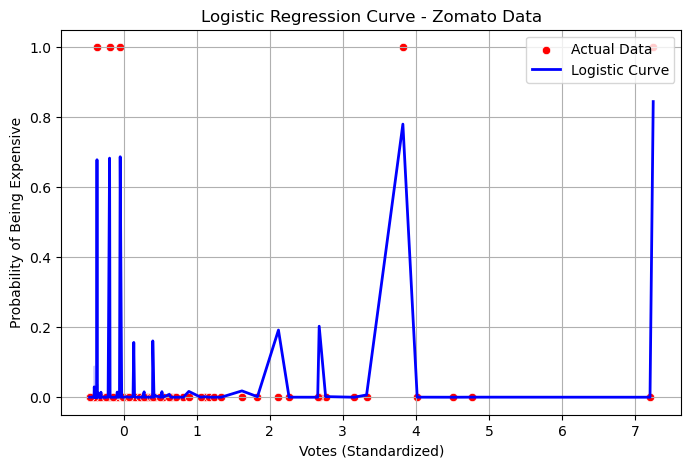

Model Accuracy: 1.00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

zomato_df = pd.read_csv("dataset2.csv")

print("Available Columns:", zomato_df.columns)

zomato_df["approx_cost(for two people)"] = (
    zomato_df["approx_cost(for two people)"]
    .astype(str)
    .str.replace(",", "")
    .astype(float)
)

zomato_df["is_expensive"] = (zomato_df["approx_cost(for two people)"] > 800).astype(int)

features = ["votes", "approx_cost(for two people)"]
target = "is_expensive"

zomato_df = zomato_df.dropna(subset=features)

X = zomato_df[features]
y = zomato_df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

X_test_sorted = np.sort(X_test[:, 0]).reshape(-1, 1)  
y_prob = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test[:, 0], y=y_test, color='red', label="Actual Data")
sns.lineplot(x=X_test[:, 0], y=y_prob, color='blue', linewidth=2, label="Logistic Curve")
plt.xlabel("Votes (Standardized)")
plt.ylabel("Probability of Being Expensive")
plt.title("Logistic Regression Curve - Zomato Data")
plt.legend()
plt.grid()
plt.show()

y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
